In [170]:
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
import heapq

In [190]:
data_set=pd.read_csv("PL17_18.csv")

In [191]:
data_set.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/2017,Arsenal,Leicester,4,3,H,2,2,D,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/2017,Brighton,Man City,0,2,A,0,0,D,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,12/08/2017,Chelsea,Burnley,2,3,A,0,3,A,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,12/08/2017,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,12/08/2017,Everton,Stoke,1,0,H,1,0,H,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


###### Bet 365 dataset

In [192]:
Bet365_data_set=data_set.filter(["HomeTeam","AwayTeam","FTHG","FTAG" ,"FTR","B365H","B365D","B365A"])

In [193]:
teams=Bet365_data_set.HomeTeam.unique()
print(teams)
wins_odd_array=np.array([])
draw_odd_array=np.array([])
lose_odd_array=np.array([])
lose_odd1_array=np.array([])

['Arsenal' 'Brighton' 'Chelsea' 'Crystal Palace' 'Everton' 'Southampton'
 'Watford' 'West Brom' 'Man United' 'Newcastle' 'Bournemouth' 'Burnley'
 'Leicester' 'Liverpool' 'Stoke' 'Swansea' 'Huddersfield' 'Tottenham'
 'Man City' 'West Ham']


In [194]:
for i in teams:
    #print(i)
    team_wins=Bet365_data_set.loc[((Bet365_data_set["HomeTeam"]==i) & (Bet365_data_set["FTR"]=="H")) | ((Bet365_data_set["AwayTeam"]==i) & (Bet365_data_set["FTR"]=="A"))]
    team_draws= Bet365_data_set.loc[((Bet365_data_set["HomeTeam"]==i) & (Bet365_data_set["FTR"]=="D")) | ((Bet365_data_set["AwayTeam"]==i) & (Bet365_data_set["FTR"]=="D"))]
    team_loses=Bet365_data_set.loc[((Bet365_data_set["HomeTeam"]==i) & (Bet365_data_set["FTR"]=="A")) | ((Bet365_data_set["AwayTeam"]==i) & (Bet365_data_set["FTR"]=="H"))]
    no_of_wins=team_wins.count()[0]
    no_of_draws=team_draws.count()[0]
    no_of_loses=team_loses.count()[0]
    #print("wins: ",no_of_wins,"draws: ",no_of_draws,"loses: ",no_of_loses)
    total_win_odds=team_wins[team_wins["FTR"]=="H"].sum()["B365H"]+team_wins[team_wins["FTR"]=="A"].sum()["B365A"]
    total_draw_odds=team_draws.sum()["B365D"]
    #This is the sum if we bet on a team then we it losses
    total_lose_odds1=team_loses[team_loses["FTR"]=="H"].sum()["B365A"]+team_loses[team_loses["FTR"]=="A"].sum()["B365H"]
    #betting against it 
    total_lose_odds=team_loses[team_loses["FTR"]=="H"].sum()["B365H"]+team_loses[team_loses["FTR"]=="A"].sum()["B365A"]
    wins_odd_array=np.append(wins_odd_array,total_win_odds)
    draw_odd_array=np.append(draw_odd_array,total_draw_odds)
    lose_odd_array=np.append(lose_odd_array,total_lose_odds)
    lose_odd1_array=np.append(lose_odd1_array,total_lose_odds1)
    
print("wins odds: ",wins_odd_array,"\n draws odds: ",draw_odd_array,"\n lose odds : ",lose_odd_array,"\n lose against :",lose_odd1_array)

wins odds:  [28.79 30.2  35.11 35.06 30.55 15.46 39.65 39.29 42.85 41.4  39.33 59.01
 32.71 31.97 21.65 39.2  39.61 36.2  44.73 30.79] 
 draws odds:  [22.94 43.33 35.13 39.46 38.88 55.   28.37 50.35 27.14 27.18 37.27 50.39
 40.61 55.2  44.27 33.99 48.34 41.67 31.25 46.91] 
 lose odds :  [44.44 27.02 64.75 32.54 32.02 42.43 45.57 41.87 47.35 41.69 31.3  23.53
 34.01 21.1  38.63 42.7  33.72 25.64  7.3  35.95] 
 lose against : [ 42.4  158.97  23.18 120.18  88.84  87.35 126.11 109.47  15.98 144.95
 126.3   82.52  87.22  14.93 147.5  167.18 160.83  20.59   4.18 101.86]


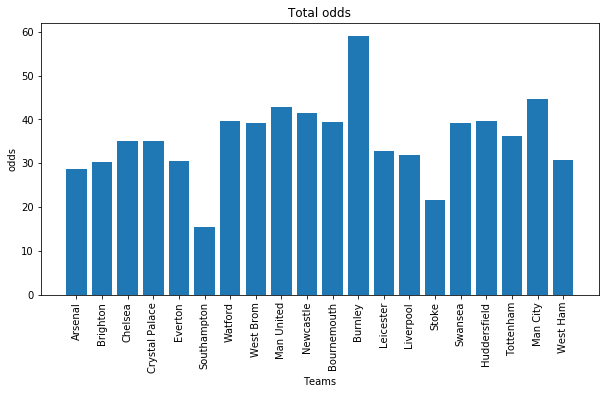

In [196]:
objects = tuple(teams)
y_pos = np.arange(len(objects))
performance = wins_odd_array
plt.bar(y_pos, performance)
plt.xticks(y_pos, objects)
plt.xticks(rotation=90)
plt.ylabel('odds')
plt.xlabel('Teams')
plt.title('Total odds')
plt.show()

In [197]:
top_5_wins=heapq.nlargest(5, range(len(wins_odd_array)), key=wins_odd_array.__getitem__)
for i in top_5_wins:
    print("Max odd wins :",teams[i],"...",wins_odd_array[i])

Max odd wins : Burnley ... 59.010000000000005
Max odd wins : Man City ... 44.730000000000004
Max odd wins : Man United ... 42.85
Max odd wins : Newcastle ... 41.4
Max odd wins : Watford ... 39.650000000000006


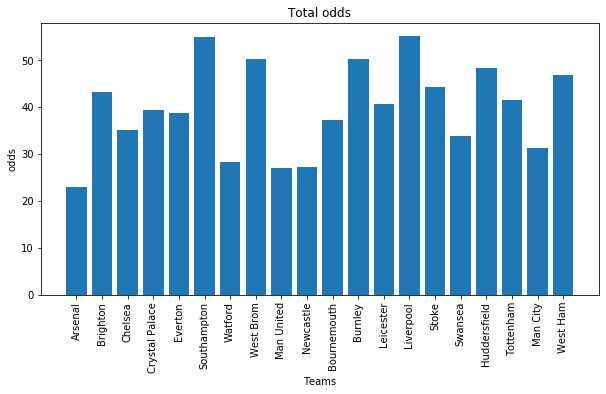

In [198]:
objects = tuple(teams)
y_pos = np.arange(len(objects))
performance = draw_odd_array
plt.bar(y_pos, performance)
plt.xticks(y_pos, objects)
plt.xticks(rotation=90)
plt.ylabel('odds')
plt.xlabel('Teams')
plt.title('Total odds')
plt.show()

In [199]:
top_5_draws=heapq.nlargest(5, range(len(draw_odd_array)), key=draw_odd_array.__getitem__)
for i in top_5_draws:
    print("Max odd draws :",teams[i],"...",draw_odd_array[i])

Max odd draws : Liverpool ... 55.2
Max odd draws : Southampton ... 54.99999999999999
Max odd draws : Burnley ... 50.39000000000001
Max odd draws : West Brom ... 50.35000000000001
Max odd draws : Huddersfield ... 48.34


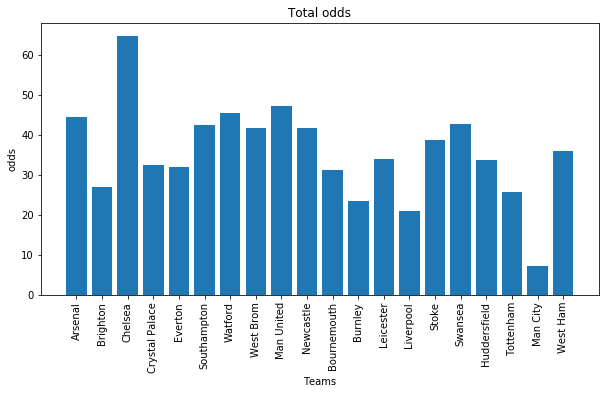

In [200]:
objects = tuple(teams)
y_pos = np.arange(len(objects))
performance = lose_odd_array
plt.bar(y_pos, performance)
plt.xticks(y_pos, objects)
plt.xticks(rotation=90)
plt.ylabel('odds')
plt.xlabel('Teams')
plt.title('Total odds')
plt.show()

In [203]:
top_5_lose=heapq.nlargest(5, range(len(lose_odd_array)), key=lose_odd_array.__getitem__)
for i in top_5_lose:
    print("loses odd loses :",teams[i],"...",lose_odd_array[i])


loses odd loses : Chelsea ... 64.75
loses odd loses : Man United ... 47.35
loses odd loses : Watford ... 45.57000000000001
loses odd loses : Arsenal ... 44.44
loses odd loses : Swansea ... 42.7


In [202]:
top_5_lose1=heapq.nlargest(5, range(len(lose_odd1_array)), key=lose_odd1_array.__getitem__)
for i in top_5_lose1:
    print("Max odd wins :",teams[i],"...",lose_odd1_array[i])

Max odd wins : Swansea ... 167.18
Max odd wins : Huddersfield ... 160.82999999999998
Max odd wins : Brighton ... 158.96999999999997
Max odd wins : Stoke ... 147.5
Max odd wins : Newcastle ... 144.95
